<a href="https://colab.research.google.com/github/Za-Zarin/Code/blob/main/366_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1: No order placed. Stock level: 50.
Day 2: No order placed. Stock level: 50.
Day 3: No order placed. Stock level: 50.
Day 4: No order placed. Stock level: 50.
Day 5: No order placed. Stock level: 50.
Day 6: No order placed. Stock level: 50.
Day 7: No order placed. Stock level: 50.
Day 8: No order placed. Stock level: 50.
Day 9: No order placed. Stock level: 50.
Day 10: No order placed. Stock level: 50.
Day 11: No order placed. Stock level: 50.
Day 12: No order placed. Stock level: 50.
Day 13: No order placed. Stock level: 50.
Day 14: No order placed. Stock level: 50.
Day 15: No order placed. Stock level: 50.
Day 16: No order placed. Stock level: 50.
Day 17: No order placed. Stock level: 50.
Day 18: No order placed. Stock level: 50.
Day 19: No order placed. Stock level: 50.
Day 20: No order placed. Stock level: 50.
Day 21: No order placed. Stock level: 50.
Day 22: No order placed. Stock level: 50.
Day 23: No order placed. Stock level: 50.
Day 24: No order placed. Stock level: 50.
D

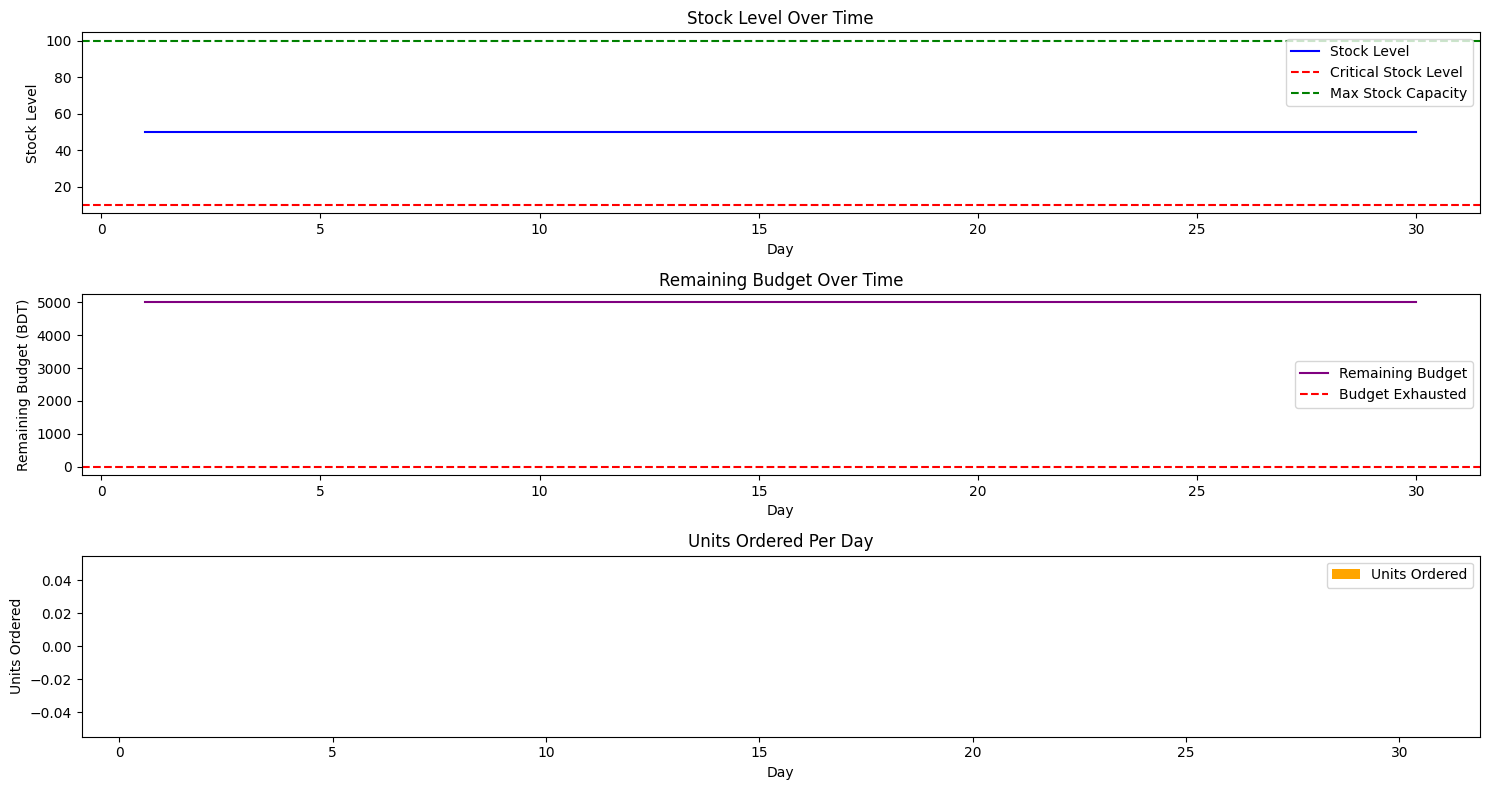

In [1]:
import matplotlib.pyplot as plt

class TradingAgent:
    def __init__(self, average_price, critical_stock=10, min_order=10, regular_order=15,
                 monthly_budget=5000, max_stock_capacity=100, max_monthly_orders=200):
        self.average_price = average_price          # Average price of the smartphone
        self.critical_stock = critical_stock        # Stock level threshold to consider critical
        self.min_order = min_order                  # Minimum units to order when stock is critical
        self.regular_order = regular_order          # Regular units to order when price is low
        self.monthly_budget = monthly_budget        # Monthly budget for purchasing inventory
        self.current_budget = monthly_budget        # Keeps track of remaining budget for the month
        self.max_stock_capacity = max_stock_capacity # Maximum stock capacity
        self.max_monthly_orders = max_monthly_orders # Maximum units to order in a month
        self.total_ordered = 0                      # Tracks total units ordered in the current month
        self.stock_level = max_stock_capacity // 2  # Start with half the max capacity for demonstration

        # Data for plotting
        self.days = []
        self.stock_levels = []
        self.budgets = []
        self.orders_placed = []

    def check_price_discount(self, current_price):
        """Checks if the current price is at least 20% lower than the average price."""
        discount_threshold = 0.8 * self.average_price  # 20% off the average price
        return current_price < discount_threshold

    def should_order_more(self, current_price):
        """
        Determines whether to place an order based on the price and stock level.
        If stock level is critically low, it orders the minimum quantity.
        If the price is discounted, it orders the regular quantity.
        """
        if self.stock_level < self.critical_stock:
            return self.min_order  # Critical stock level, place a minimum order
        elif self.check_price_discount(current_price) and self.stock_level + self.regular_order <= self.max_stock_capacity:
            return self.regular_order  # Price is discounted, place a regular order
        else:
            return 0  # No need to order if no condition is met

    def place_order(self, current_price, day):
        """Places an order based on the decision process and updates the budget and stock."""
        tobuy = self.should_order_more(current_price)
        total_cost = tobuy * current_price

        # Check constraints
        if (self.total_ordered + tobuy > self.max_monthly_orders) or (total_cost > self.current_budget):
            tobuy = 0  # Don’t place order if it exceeds max monthly orders or budget

        if tobuy > 0:
            # Adjust the budget and stock if the order is valid
            self.current_budget -= total_cost
            self.stock_level += tobuy
            self.total_ordered += tobuy
            print(f"Day {day}: Ordered {tobuy} units. Total cost: {total_cost} BDT. Stock level: {self.stock_level}.")
        else:
            print(f"Day {day}: No order placed. Stock level: {self.stock_level}.")

        # Logging data for plotting
        self.days.append(day)
        self.stock_levels.append(self.stock_level)
        self.budgets.append(self.current_budget)
        self.orders_placed.append(tobuy)

    def reset_month(self):
        """Resets budget and total ordered for the new month."""
        self.current_budget = self.monthly_budget
        self.total_ordered = 0

# Simulation for plotting
import numpy as np

# Initialize the TradingAgent
agent = TradingAgent(average_price=600)

# Run a 30-day simulation with fluctuating prices
np.random.seed(0)  # For reproducibility
price_trend = 600 + 50 * np.sin(np.linspace(0, 3 * np.pi, 30))  # Simulating a sinusoidal price trend

for day in range(1, 31):
    current_price = price_trend[day - 1]
    agent.place_order(current_price, day)

    # Reset at the end of the month for simplicity (e.g., day 30)
    if day == 30:
        agent.reset_month()

# Plotting the results
plt.figure(figsize=(15, 8))

# Plot stock level over time
plt.subplot(3, 1, 1)
plt.plot(agent.days, agent.stock_levels, color='blue', label="Stock Level")
plt.axhline(y=agent.critical_stock, color='red', linestyle='--', label="Critical Stock Level")
plt.axhline(y=agent.max_stock_capacity, color='green', linestyle='--', label="Max Stock Capacity")
plt.xlabel("Day")
plt.ylabel("Stock Level")
plt.title("Stock Level Over Time")
plt.legend()

# Plot remaining budget over time
plt.subplot(3, 1, 2)
plt.plot(agent.days, agent.budgets, color='purple', label="Remaining Budget")
plt.axhline(y=0, color='red', linestyle='--', label="Budget Exhausted")
plt.xlabel("Day")
plt.ylabel("Remaining Budget (BDT)")
plt.title("Remaining Budget Over Time")
plt.legend()

# Plot orders placed each day
plt.subplot(3, 1, 3)
plt.bar(agent.days, agent.orders_placed, color='orange', label="Units Ordered")
plt.xlabel("Day")
plt.ylabel("Units Ordered")
plt.title("Units Ordered Per Day")
plt.legend()

plt.tight_layout()
plt.show()

